# 使用PCA进行二维数据降维

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
data2 = sio.loadmat("./exp7data/exp7data2.mat")
data2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [3]:
X = data2["X"]
X.shape

(50, 2)

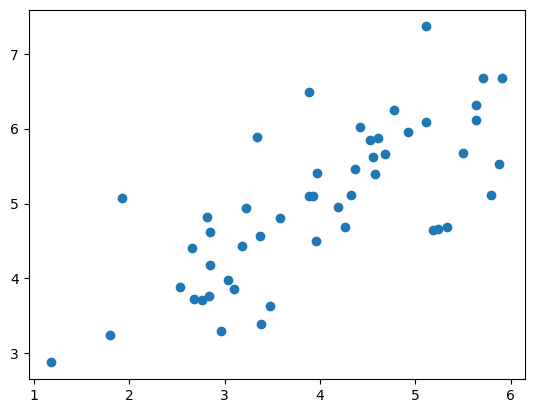

In [4]:
plt.scatter(X[:,0], X[:, -1])
plt.show()

## 去均值

当数据集中的特征具有不同的尺度和单位时，具有较大尺度的特征将在PCA中占据较大的权重，这可能导致不均匀地强调某些特征。通过去均值，每个特征的平均值变为0，从而使得PCA不再受到特征尺度的影响，可以更公平地评估所有特征的重要性。

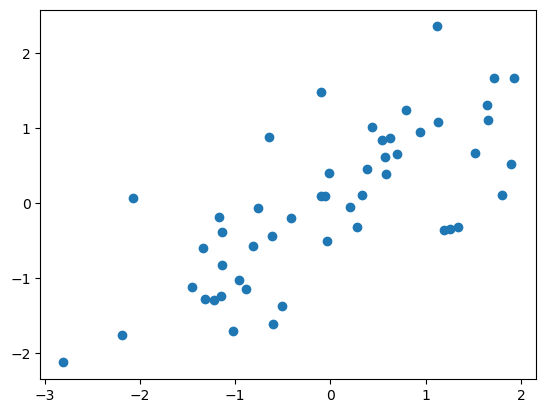

In [5]:
X_dmean = X - np.mean(X, axis=0)
plt.scatter(X_dmean[:, 0], X_dmean[:, 1])
plt.show()

## 计算协方差

In [7]:
C = X_dmean.T@X_dmean / len(X)
C

array([[1.34852518, 0.86535019],
       [0.86535019, 1.02641621]])

## 计算特征值和特征向量

In [8]:
U, S, V = np.linalg.svd(C)
U, S, V  # 奇异值分解

(array([[-0.76908153, -0.63915068],
        [-0.63915068,  0.76908153]]),
 array([2.06768062, 0.30726078]),
 array([[-0.76908153, -0.63915068],
        [-0.63915068,  0.76908153]]))

In [9]:
U1, U2 = U[:,0], U[:,1]
U1, U2

(array([-0.76908153, -0.63915068]), array([-0.63915068,  0.76908153]))

## 降维

In [11]:
X_reduction = X_dmean@U1

X_dmean.shape, X_reduction.shape

((50, 2), (50,))

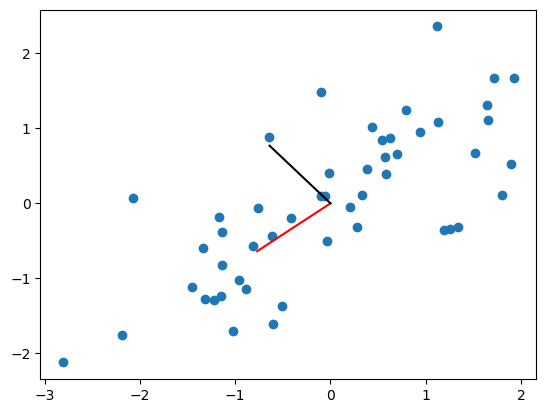

In [14]:
plt.figure()
plt.scatter(X_dmean[:,0], X_dmean[:,1])
plt.plot([0, U1[0]], [0,U1[1]], c="r")
plt.plot([0, U2[0]], [0,U2[1]], c="k")
plt.show()

## 还原数据

In [15]:
X_restore = X_reduction.reshape(50, 1)@U1.reshape(1, 2)
X_restore += np.mean(X, axis=0)

In [16]:
X_reduction.shape

(50,)